<h2>Project 2: The Perceptron</h2>


<!--announcements-->
<blockquote>
    <center>
    <img src="perceptron.png" width="200px" />
    </center>
      <p><cite><center>"What, we asked, wasn't the Perceptron capable of?"<br>
      Rival, The New Yorker, December 6, 1958 P. 44</center>
      </cite></p>
</blockquote>

<h3>Introduction</h3>
<!--AÃ°albrandr-->

<p>In this project, you will implement a simple Perceptron classifier to classify digits (or anything else).</p>

<p><strong>Project Notes:</strong> The due date is <strong>11:59 pm EST on September 26th</strong>. Late submissions are accepted and the late due date is <strong>11:59 pm EST on September 28th</strong>. Submissions beyond the late due date will not be recorded.

<strong>How to submit:</strong> You can submit your code using the <strong>Submit</strong> button above. This button will send any code below surrounded by <strong>#&lt;GRADED&gt;</strong><strong>#&lt;/GRADED&gt;</strong> tags below to the autograder, which will then run several tests over your code. By clicking on the <strong>Details</strong> dropdown next to the Submit button, you will be able to view your submission report once the autograder has completed running. This submission report contains a summary of the tests you have failed or passed, as well as a log of any errors generated by your code when we ran it.

Note that this may take a while depending on how long your code takes to run! Once your code is submitted you may navigate away from the page as you desire -- the most recent submission report will always be available from the Details menu.

<p><strong>Evaluation:</strong> Your code will be autograded for technical
correctness. Please <em>do not</em> change the names of any provided functions or classes within the code, or you will wreak havoc on the autograder. However, the correctness of your implementation -- not the autograder's output -- will be the final judge of your score.  If necessary, we will review and grade assignments individually to ensure that you receive due credit for your work.

<p><strong>Academic Dishonesty:</strong> We will be checking your code against other submissions in the class for logical redundancy. If you copy someone else's code and submit it with minor changes, we will know. These cheat detectors are quite hard to fool, so please don't try. We trust you all to submit your team's own work only; <em>please</em> don't let us down. If you do, we will pursue the strongest consequences available to us.

<p><strong>Getting Help:</strong> You are not alone!  If you find yourself stuck  on something, contact the course staff for help.  Office hours, section, and the <a href="https://edstem.org/us/courses/42986/">Ed Discussion</a> are there for your support; please use them.  We want these projects to be rewarding and instructional, not frustrating and demoralizing.  But, we don't know when or how to help unless you ask.


<p><strong>Python initialization:</strong> Please run the following code to initialize your Python kernel. You should be running a version of Python 3.x. </p>

In [1]:
#<GRADED>
import numpy as np
from matplotlib import *
#matplotlib.use('PDF')
from pylab import *
from collections import Counter
#</GRADED>
import sys
import matplotlib.pyplot as plt
import time

# add p02 folder
sys.path.insert(0, './p02/')

%matplotlib notebook
print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.7.5


<h3> The Perceptron <b>(95 points)</b> </h3>

<p>The perceptron is a basic linear classifier. The following questions will ask you to finish these functions in a pre-defined order. Unless specified otherwise, do not use loops.<br></p>

<p>(a) Implement the process of updating the weight vector in the following function.




In [2]:
#<GRADED>
def perceptronUpdate(x,y,w):
    """
    function w=perceptronUpdate(x,y,w);
    
    Implementation of Perceptron weights updating
    Input:
    x : input vector of d dimensions with size (d, )
    y : corresponding label (-1 or +1)
    w : weight vector of d dimensions
    
    Output:
    w : weight vector after updating with size (d, )
    """
    assert(y in {-1,1})
    assert(len(w.shape)==1), "At the update w must be a vector not a matrix (try w=w.flatten())"
    assert(len(x.shape)==1), "At the update x must be a vector not a matrix (try x=x.flatten())"
    d, = x.shape
    ## fill in code ...
    w.flatten()
    if y*((w.T)@x)<=0:
        w=(w+y*x).flatten()
    ## ... until here
    assert(len(w.shape)==1), "After the update w must be a vector not a matrix (try w=w.flatten())"
    assert(w.shape[0] == d), "w should be of shape (d, )"
    return w.flatten()
#</GRADED>

In [3]:
# test the update code:
x=rand(5) # random feature vector
w=rand(5) # random weight vector
y=-1 # random label
wnew=perceptronUpdate(x,y,w.copy()) # do a perceptron update
assert(norm(wnew-w+x)<1e-10), "perceptronUpdate didn't pass the test : (" # if correct, this should return 0
print("Looks like you passed the update test : )")

Looks like you passed the update test : )


<p>(b) Implement function <b><code>perceptron</code></b>. This should contain a loop that calls 
<b><code>perceptronUpdate</code></b>
 until it converges or the maximum iteration count, 100, has been reached.
 Make sure you randomize the order of the training data on each iteration. </p>

In [4]:
#<GRADED>
def perceptron(xs,ys,max_iter=100):
    """
    function w=perceptron(xs,ys);
    
    Implementation of a Perceptron classifier
    Input:
    xs : n input vectors of d dimensions with size (n,d)
    ys : n labels (-1 or +1)
    
    Output:
    w : weight vector with size (d, )
    b : bias term
    """

    assert(len(xs.shape)==2), "The first input to Perceptron must be a _matrix_ of row input vectors."
    assert(len(ys.shape)==1), "The second input to Perceptron must be a _vector_ of n labels (try ys.flatten())."
        
    n, d = xs.shape     # so we have n input vectors, of d dimensions each
    
    ## fill in code ...
    it_count = 0
    xs_n=np.concatenate((xs,np.ones([n,1])), axis=1)
    #m=0
    w=(np.zeros([d+1,1])).flatten()
    while (it_count<max_iter):
        #randomize order of training data on each iteration
        indices=np.random.permutation(n)
        #do perceptronUpdate(x,y,w) on each x
        m=0
        for index in indices:
            w_new=perceptronUpdate(xs_n[index],ys[index],w.flatten())
            if not (w_new==w).all():
                m+=1
                w=w_new.flatten()
        #stop if no mistakes   
        if m==0:
            b = w[d]
            w = (w[:d]).flatten()
            return (w,b)
        else:
        
            it_count+=1

    ## ... until here
    assert(len(w.shape)==1), "After the update w must be a vector not a matrix (try w=w.flatten())"
    assert(w.shape[0]==d), "w should be of shape (d, )"
    return (w,b)

#</GRADED>

<p> You can use the following script to test your code and visualize your perceptron on linearly separable data in 2 dimensions. Your classifier should find a separating hyperplane on such data.   </p>

Looks like you passed the Perceptron test! :o)


<IPython.core.display.Javascript object>


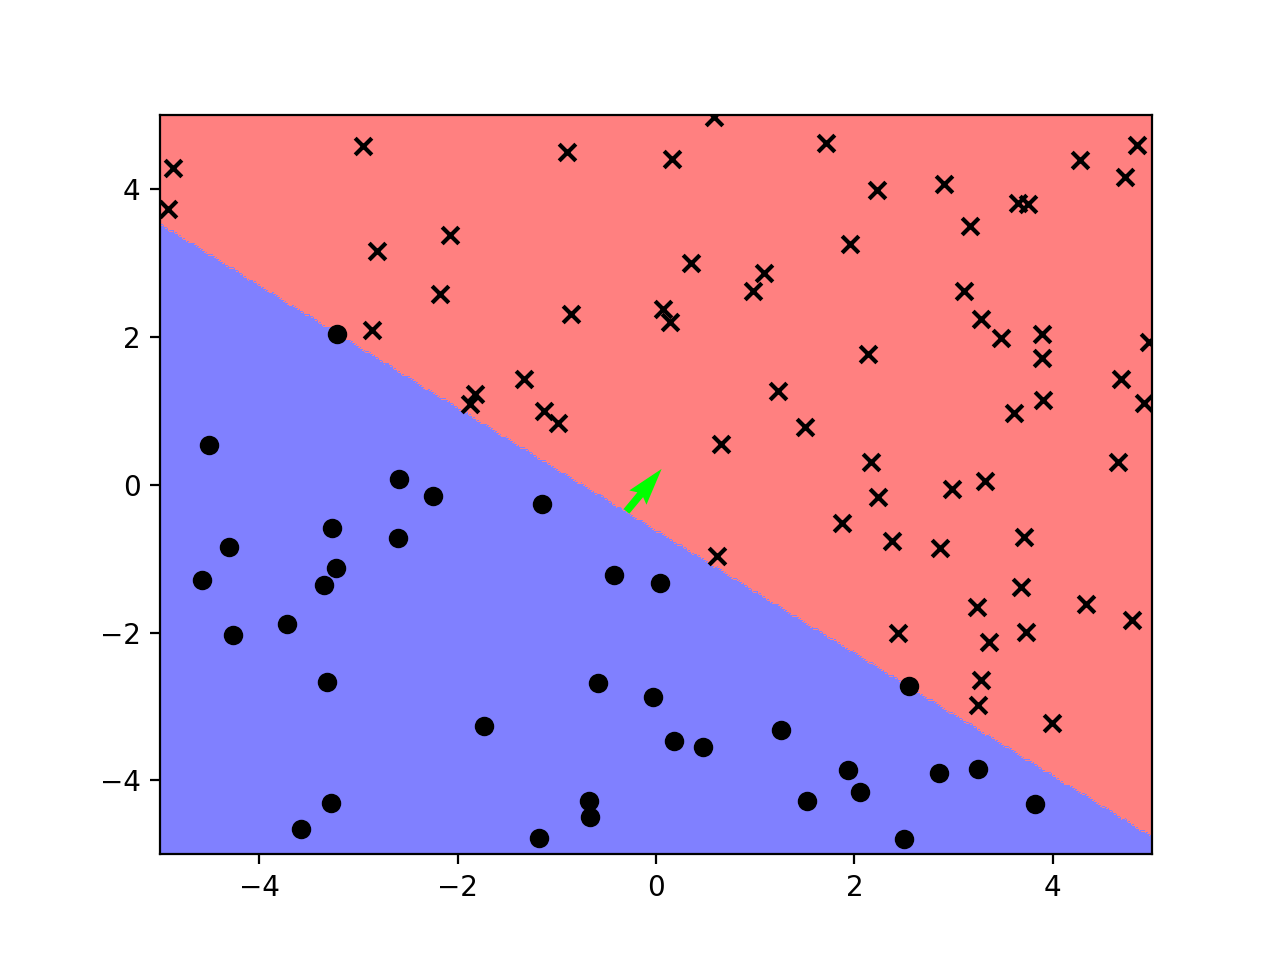

In [5]:
# number of input vectors
N = 100

# generate random (linarly separable) data
xs = np.random.rand(N, 2)*10-5

# defining random hyperplane
w0 = np.random.rand(2)
b0 = rand()*2-1

# assigning labels +1, -1 labels depending on what side of the plane they lie on
ys = np.sign(xs.dot(w0)+b0)

# call perceptron to find w from data
w,b = perceptron(xs.copy(),ys.copy())

# test if all points are classified correctly
assert (all(np.sign(ys*(xs.dot(w)+b))==1.0))  # yw'x should be +1.0 for every input
print("Looks like you passed the Perceptron test! :o)")

# we can make a pretty visualizxation
from helperfunctions import visboundary
visboundary(w,b,xs,ys)

<IPython.core.display.Javascript object>


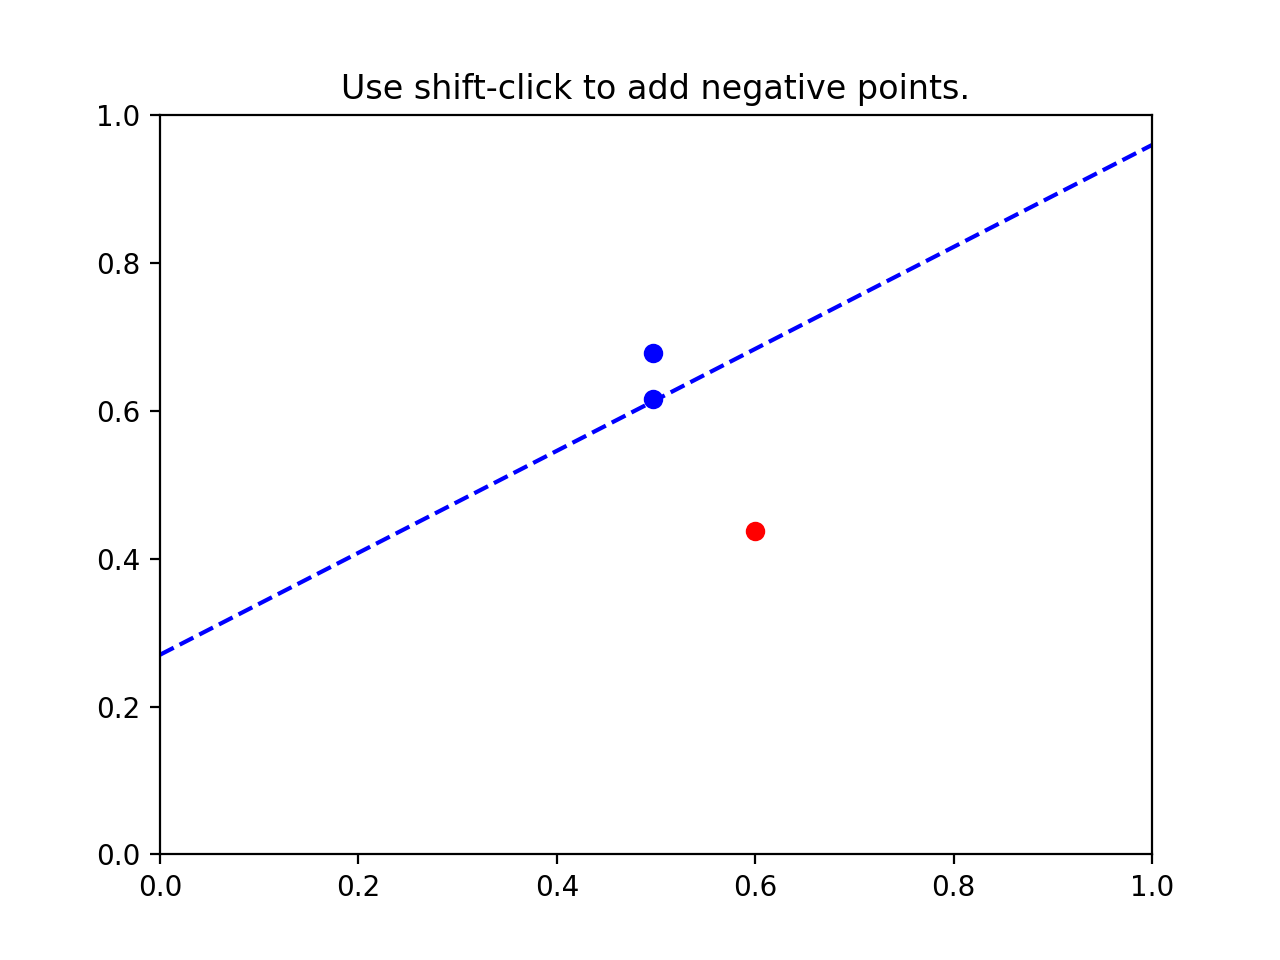

Text(0.5, 1.0, 'Use shift-click to add negative points.')

In [6]:
def onclick(event):
    global w,b,ldata,ax,line,xydata

    pos=np.array([[event.xdata],[event.ydata]])
    if event.key == 'shift': # add positive point
        color='or'
        label=1
    else: # add negative point
        color='ob'
        label=-1    
    ax.plot(pos[0],pos[1],color)
    ldata.append(label)
    xydata=np.vstack((xydata,pos.T))
    
    # call Perceptron function
    w,b=perceptron(xydata,np.array(ldata).flatten())

    # draw decision boundary
    q=-b/(w**2).sum() *w
    intercept0 = -b/w[1]
    intercept1 = -w[0]/w[1] - b/w[1]
    if line==None:
        line, = ax.plot([0, 1], [intercept0, intercept1], 'b--')
        #line, = ax.plot([q[0]-w[1],q[0]+w[1]],[q[1]+w[0],q[1]-w[0]],'b--')
    else:
        line.set_data([0, 1], [intercept0, intercept1])
        #line.set_data([q[0]-w[1],q[0]+w[1]],[q[1]+w[0],q[1]-w[0]])
        


xydata=rand(0,2)
ldata=[]
w=zeros(2)
b=0
line=None

fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim(0,1)
plt.ylim(0,1)
cid = fig.canvas.mpl_connect('button_press_event', onclick)
title('Use shift-click to add negative points.')

<p>(c) 
	Implement 
<b><code>classifyLinear</code></b>
 that applies the weight vector and bias to the input vector. (The bias is an optional parameter. If it is not passed in, assume it is zero.) Make sure that the predictions returned are either 1 or -1.</p> 



In [7]:
#<GRADED>
def classifyLinear(xs,w,b=0):
    """
    function preds=classifyLinear(xs,w,b)
    
    Make predictions with a linear classifier
    Input:
    xs : n input vectors of d dimensions with size (n,d) [could also be a single vector of d dimensions]
    w : weight vector of dimensionality d
    b : bias (scalar)
    
    Output:
    preds: predictions with each element being either 1 or -1 with size (n, )
    """    
    w = w.flatten()    
    n,_ = xs.shape
    preds = np.zeros(n)
    ## fill in code ...
    w_t = (np.concatenate((w,[b]), axis=0)).T
    x_t = (np.concatenate((xs,np.ones([n,1])),axis=1)).T
    preds = np.sign((w_t@x_t).T)
#     i_preds = np.abs(np.reciprocal(r_preds))
#     preds = r_preds*i_preds
    ## ... until here
    assert(preds.shape[0]==n), "preds should be of size (n, )"
    return preds
#</GRADED>

In [8]:
# test classifyLinear code:
xs=rand(1000,2)-0.5 # draw random data 
w0=np.array([0.5,-0.3]) # define a random hyperplane 
b0=-0.1 # with bias -0.1
ys=np.sign(xs.dot(w0)+b0) # assign labels according to this hyperplane (so you know it is linearly separable)
assert (all(np.sign(ys*classifyLinear(xs,w0,b0))==1.0))  # the original hyperplane (w0,b0) should classify all correctly
print("Looks like you passed the classifyLinear test! :o)")

Looks like you passed the classifyLinear test! :o)


<h3>Competition <b>(5 points)</b></h3>

<p>The competition for this assignment is to achieve the highest accuracy on the hidden test set (randomly sampled) using the perceptron algorithm you implemented above. You will have access to a training, and a validation set but not the actual test set.
    
You will receive full points on this section as long as you beat a baseline which we have implemented.

<p>The competition for this assignment is split into three components you can modify:</p>

<ol>
<li><b>Feature Selection</b>:
Modify the function <code>selectfeaturescomp</code>.
This function takes in a list of file paths <code>paths</code>, a vector of training labels <code>labels</code> and
a feature dimension <code>B</code> and outputs <code>B</code> tokens that are selected as features. This output is then passed into the feature extraction function described below.
Notice this function runs on the training set only.
We provide <code>selectfeaturesnaive</code> as an example.
</li>
<li><b>Feature Extraction</b>:
Modify the function <code>extractfeaturescomp</code>.
This function takes in a list of file paths <code>paths</code>,
a feature dimension <code>B</code> and the output of your feature selection function <code>selected_features</code> and should output a feature matrix of dimension <code>n*B</code> (n examples as rows, with B columns each).
The autograder will pass in a list of file paths pointing to files that contains an email,
and set <code>B</code> = <code>feature_dimension</code>.
This function is used to extract vectors from emails on both the training and test set.
We provide <code>extractfeaturesnaive</code> as an example.
</li>
<li><b>Model Training</b>:
Modify the function <code>trainspamfiltercomp</code>.
This function takes in training data <code>xTr</code> and training labels <code>yTr</code> and
should output a weight vector <code>w</code> for linear classification. <b>You must use the perceptron algorithm implemented above </b> although you are free to tweak the parameters such as the number of iterations.
We provide an initial implementation of a random classifier.
</li>
</ol>

<p>Your model will be trained on the following dataset (loaded by <code>loadspamdata</code>), but we will test its accuracy on a secret dataset of emails.</p>

In [ ]:
#<GRADED>
def tokenizer(path):
    """
    Returns the tokens in one email file
    You can use this tokenizer in your solution, or you can implement your own tokenizer
    
    Input:
    path: string, path to the email file
    Output:
    list of tokens in the email
    """
    with open(path, 'r') as femail:
        email = femail.read()
        # breaks for non-ascii characters
        tokens = email.split()
    return tokens
#</GRADED>

def selectfeaturesnaive(paths, labels, B):
    """
    A naive implementation of feature selection.
    Returns the B most common words in the training emails.
    This runs on the training set only.
    
    Input:
    paths: list of length n, path to email files
    labels: label vector of length n, +1 for spam and -1 for ham
    B: int, the feature dimension
    Output:
    List of the B most common words, this will be used in the feature extracter
    """
    # initialize a counter for all tokens
    counter = Counter()
    for i, path in enumerate(paths):
        tokens = tokenizer(path)
        counter.update(tokens)
    # Get the most common words
    most_common = [word for word, count in counter.most_common(B)]
    return most_common

def extractfeaturesnaive(paths, B, selected_feature):
    """
    A naive implemenation of feature extraction.
    Converts each email to a vector of length B, indicating the existence of each most common word
    This runs on both the training and testing set.
    
    Input:
    paths: list of length n, path to email files
    B: int, the feature dimension
    selected_feature: the output of selectfeaturesnaive()
    Output:
    n*B matrix, with each row vector corresponding to one email
    """
    # initialize all-zeros feature vector
    v = np.zeros((len(paths), B))
    for (i, path) in enumerate(paths):
        tokens = tokenizer(path) 
        for token in tokens:
            if token in selected_feature:
                v[i, selected_feature.index(token)] = 1
            
    return v

def loadspamdata(selectfeatures, extractfeatures, B=50, path="../resource/lib/public/new_train_data/"):
    '''
    INPUT:
    selectfeatures  : function to select features
    extractfeatures : function to extract features
    B               : dimensionality of feature space
    path            : the path of folder to be processed
    
    OUTPUT:
    X, Y
    '''
    if path[-1] != '/':
        path += '/'
    
    with open(path + 'index', 'r') as f:
        allemails = [x for x in f.read().split('\n') if ' ' in x]
    
    ys = np.zeros(len(allemails))
    paths = []
    for i, line in enumerate(allemails):
        label, filename = line.split(' ')
        # make labels +1 for "spam" and -1 for "ham"
        ys[i] = (label == 'spam') * 2 - 1
        paths.append(path+filename)
    selected_feature = selectfeatures(paths, ys, B)
    xs = extractfeatures(paths, B, selected_feature)
    return xs, ys

X,Y = loadspamdata(selectfeaturesnaive, extractfeaturesnaive)
X.shape

This is your training set. To do proper model selection and avoid overfitting, you should split it off into a validation set. Here's one implementation but feel free to <b> try other methods including k-fold cross validation </b>.

In [ ]:
#<GRADED>

def validation_split(X, Y):
    # Split data into training and validation
    n, d = X.shape
    cutoff = int(np.ceil(0.8 * n))
    # indices of training samples
    xTr = X[:cutoff,:]
    yTr = Y[:cutoff]
    # indices of validation samples
    xTv = X[cutoff:,:]
    yTv = Y[cutoff:]

    ## fill in code ...
    ## ... until here
    
    return xTr, yTr, xTv, yTv

#</GRADED>

xTr, yTr, xTv, yTv = validation_split(X, Y)

<p>This should generate a training data set <code>xTr</code>, <code>yTr</code> and a validation set <code>xTv</code>, <code>yTv</code> for you. </p>

<p>It is now time to implement your classifiers.</p>

In [ ]:
#<GRADED>
## you may change the value of feature_dimension, but don't change the variable name
feature_dimension = 50

def selectfeaturescomp(paths, labels, B):
    """
    Your implementation of feature selection.
    This runs on the training set only.
    You can copy from the naive implementation as a starting point.
    
    Input:
    paths: list of length n, path to email files
    labels: label vector of length n, +1 for spam and -1 for ham
    B: int, the feature dimension
    Output:
    Anything you'd like
    """
    # initialize a counter for all tokens
    counter = Counter()
    for i, path in enumerate(paths):
        tokens = tokenizer(path)
        counter.update(tokens)
    # Get the most common words
    most_common = [word for word, count in counter.most_common(B)]
    return most_common

def extractfeaturescomp(paths, B, selected_feature):
    """
    Your implementation of feature extraction.
    This runs on both the training and testing set.
    You can copy from the naive implementation as a starting point.
    
    Input:
    paths: list of length n, path to email files
    B: int, the feature dimension
    selected_feature: the output of your selectfeaturescomp()
    Output:
    matrix with shape (n,B), with each row vector corresponding to one email
    """
      # initialize all-zeros feature vector
    v = np.zeros((len(paths), B))
    for (i, path) in enumerate(paths):
        tokens = tokenizer(path) 
        for token in tokens:
            if token in selected_feature:
                v[i, selected_feature.index(token)] = 1
            
    return v
    
#</GRADED>

In [31]:
#<GRADED>
def trainspamfiltercomp(xTr, yTr):
    '''
    INPUT:
    xTr : matrix with shape (n,d), each row being an input vector
    yTr : vector with shape (d, ), each entry being a label
    
    OUTPUTS:
    w : d dimensional vector for linear classification
    b: bias term
    '''
    w = np.random.rand(np.shape(xTr)[1])
    b = np.random.rand()
    
    ## fill in code ...
    w, b = perceptron(xTr,yTr,1000)
    ## ... until here   
    
    return w,b
#</GRADED>

In [32]:
## Evaluate the performance on your validation set here
